## Домашнее задание

**Lvl 1:**

* взять подготовленные раннее данные из задачи **Titanic**, обучиться на них с помощью дерева решений и кросс-валидации и сделать сабмит
* кросс-валидацию желательно сделать сразу по нескольким фичам ( параметр *grid* в *GridSearchCV* )
* определить самые важные фичи
* вывести дерево решений (можете попробовать установить pydot и webgraphviz для отрисовки деревьев внутри ноутбука)

**Результат:** скрины нового сабмита на Kaggle и построенного дерева

**Lvl 2:** (опционально)

* С помощью функций sklearn.metrics.auc, precision, recall составить функцию для расчёта ROC-AUC, ROC-PRC
* Придумать себе интересную задачу на основе данных из интернета =) Спарсить ещё какой-нибудь сайт (не Ведомости) и решить задачу классификации. Делать свои проекты - круто. Если будут - кидайте мне =) [@NikitaKuznetsov](http://t.me/NikitaKuznesov)

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (9, 6)

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [3]:
import pickle
def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [4]:
X_train_imputed_scaled = load_obj('X_train_imputed_scaled')
X_test_imputed_scaled = load_obj('X_test_imputed_scaled')
y_train = load_obj('y_train')

In [67]:
clf = DecisionTreeClassifier()

depths = np.arange(1,10)
grid = {'max_depth': depths, 'criterion':['gini', 'entropy'],'min_samples_split':[2,4,6], 'min_samples_leaf':[1,2,3] }
gridsearch = GridSearchCV(DecisionTreeClassifier(), grid, scoring='neg_log_loss', cv=5)
gridsearch.fit(X_train_imputed_scaled, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 4, 6], 'min_samples_leaf': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=0)

In [68]:
gridsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [69]:

for col, val in zip(X_train_imputed_scaled.columns, gridsearch.best_estimator_.feature_importances_):
    print("{:30} {:.4f}".format(col, val))

Age                            0.0000
SibSp                          0.0000
Parch                          0.0000
Fare                           0.0793
isMale                         0.6927
Pclass_1                       0.0000
Pclass_2                       0.0000
Pclass_3                       0.2280
Embarked_C                     0.0000
Embarked_Q                     0.0000
Embarked_S                     0.0000


In [70]:
y_pred_train = gridsearch.best_estimator_.predict_proba(X_train_imputed_scaled)

In [71]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_pred_train[:,1].reshape(-1,1))

0.8335037654853588

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, gridsearch.best_estimator_.predict(X_train_imputed_scaled))

0.7867564534231201

In [73]:
y_pred_test = gridsearch.best_estimator_.predict(X_test_imputed_scaled)

In [74]:
y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [75]:
X_test_imputed_scaled

array([[ 0.36944878, -0.4745452 , -0.47367361, ..., -0.48204268,
         3.25137334, -1.61470971],
       [ 1.33137817,  0.43279337, -0.47367361, ..., -0.48204268,
        -0.30756234,  0.61930636],
       [ 2.48569343, -0.4745452 , -0.47367361, ..., -0.48204268,
         3.25137334, -1.61470971],
       ...,
       [ 0.67726619, -0.4745452 , -0.47367361, ..., -0.48204268,
        -0.30756234,  0.61930636],
       [ 0.        , -0.4745452 , -0.47367361, ..., -0.48204268,
        -0.30756234,  0.61930636],
       [ 0.        ,  0.43279337,  0.76762988, ...,  2.0745051 ,
        -0.30756234, -1.61470971]])

In [76]:
test = pd.read_csv('test.csv')
f_name = test.keys()
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [77]:
test['Survived']= y_pred_test

In [78]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [79]:
result = test[['PassengerId','Survived']]
result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [80]:
result.to_csv('result1.csv', index=False)

In [81]:
from sklearn.tree import export_graphviz
print(export_graphviz(gridsearch.best_estimator_, feature_names=f_name, out_file=None, filled=True) )

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="Age <= -0.309\nentropy = 0.961\nsamples = 891\nvalue = [549, 342]", fillcolor="#e5813960"] ;
1 [label="Ticket <= -0.103\nentropy = 0.824\nsamples = 314\nvalue = [81, 233]", fillcolor="#399de5a6"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="entropy = 0.299\nsamples = 170\nvalue = [9, 161]", fillcolor="#399de5f1"] ;
1 -> 2 ;
3 [label="entropy = 1.0\nsamples = 144\nvalue = [72, 72]", fillcolor="#e5813900"] ;
1 -> 3 ;
4 [label="Sex <= -0.12\nentropy = 0.699\nsamples = 577\nvalue = [468, 109]", fillcolor="#e58139c4"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="entropy = 0.558\nsamples = 415\nvalue = [361, 54]", fillcolor="#e58139d9"] ;
4 -> 5 ;
6 [label="entropy = 0.924\nsamples = 162\nvalue = [107, 55]", fillcolor="#e581397c"] ;
4 -> 6 ;
}


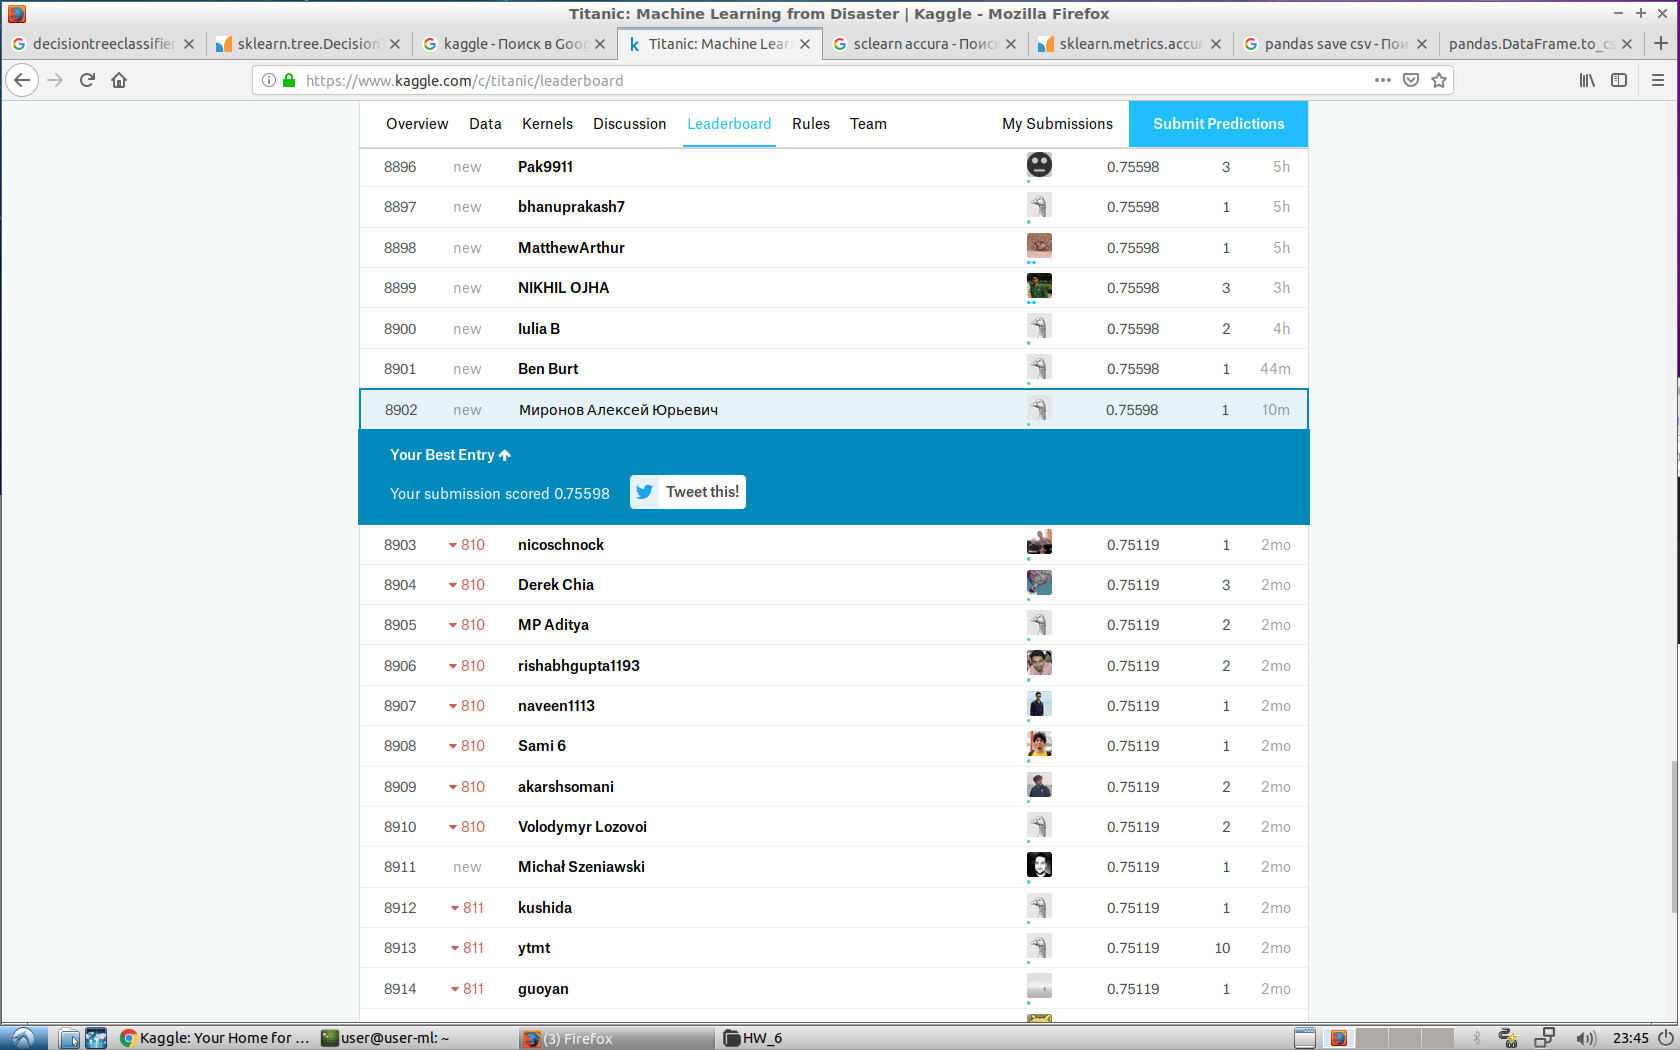

In [85]:
from IPython.display import Image
Image("commit.png")

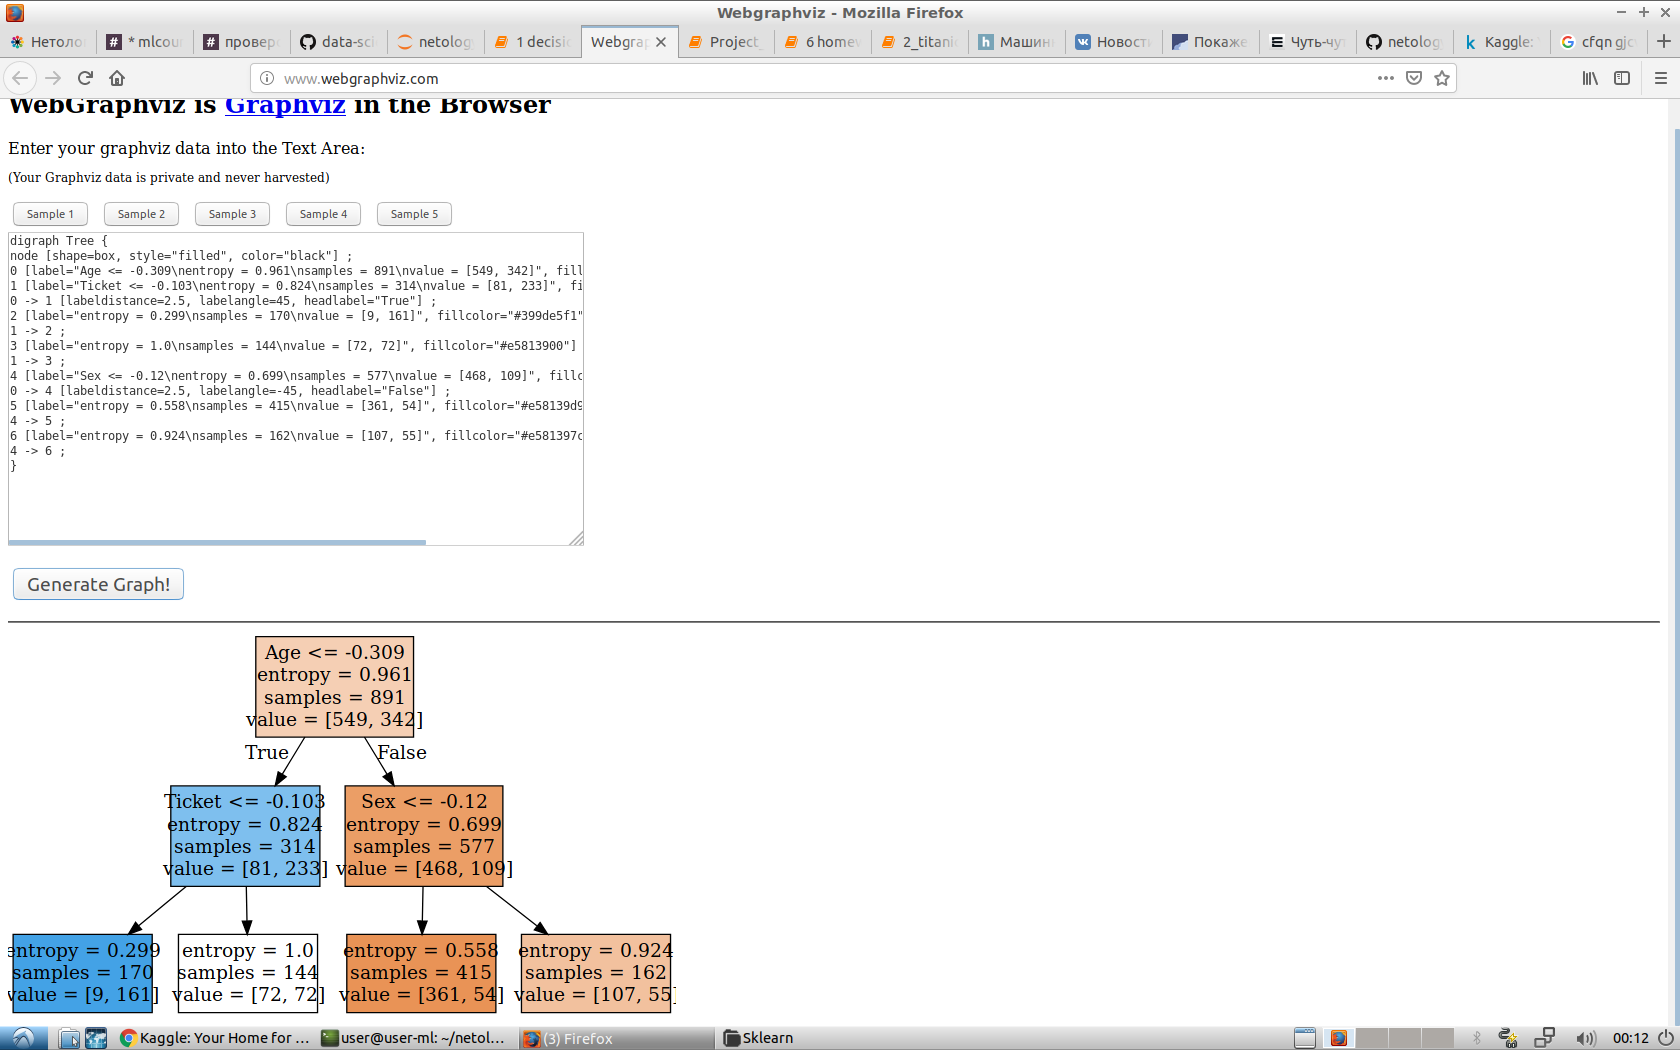

In [86]:
from IPython.display import Image
Image("tree.png")